<a href="https://colab.research.google.com/github/Zeljko12980/AI-model-for-Brain-Tumor-Detection/blob/main/AIDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
# Putanje do foldera sa slikama
yes_path = '/content/brain_tumor_dataset/yes'
no_path = '/content/brain_tumor_dataset/no'

data = []
labels = []

# Čitanje slika sa tumorom
for img in os.listdir(yes_path):
    img_path = os.path.join(yes_path, img)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    data.append(img)
    labels.append(1)

# Čitanje slika bez tumora
for img in os.listdir(no_path):
    img_path = os.path.join(no_path, img)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    data.append(img)
    labels.append(0)

# Konverzija u numpy niz i normalizacija
data = np.array(data) / 255.0
labels = np.array(labels)

# Podela na trening i test skup
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# One-hot encoding
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # za binary classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9398 - loss: 0.1809 - val_accuracy: 0.8824 - val_loss: 0.6008
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9483 - loss: 0.1068 - val_accuracy: 0.9216 - val_loss: 0.6068
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9339 - loss: 0.1606 - val_accuracy: 0.8824 - val_loss: 0.5292
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 986ms/step - accuracy: 0.9426 - loss: 0.2062 - val_accuracy: 0.8824 - val_loss: 0.5804
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9695 - loss: 0.1123 - val_accuracy: 0.8824 - val_loss: 0.5235
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9483 - loss: 0.1121 - val_accuracy: 0.8824 - val_loss: 0.5033
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 981ms/step - accuracy: 0.9499 - loss: 0.1307 - val_accuracy: 0.9020 - val_loss: 0.5934
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9621 - loss: 0.1028 - val_accuracy: 0.8824 - val_loss: 0.5638
Epoch 9/5

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.9373 - loss: 0.5792

Test Accuracy: 92.16%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.96      0.89      0.92        27

    accuracy                           0.92        51
   macro avg       0.92      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51



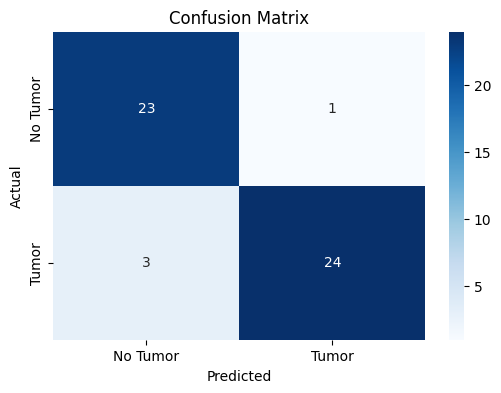

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Predikcije
y_pred = model.predict(X_test)
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Izveštaj
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Konfuziona matrica
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [35]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128)) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    return "Tumor" if class_index == 1 else "No Tumor"

# Primer:
print(predict_image("/content/brain_tumor_dataset/glioma/gg (220).jpg"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Tumor


In [25]:
# Sačuvaj model
model.save("najtacniji.h5")

# Učitaj model (kasnije)
# model = load_model("tumor_detection_model.h5")